# 데이터셋 불러오기

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

data_train, data_test = tf.keras.datasets.mnist.load_data()
(image_train, labels_train)= data_train
(image_test, labels_test)= data_test

# 한개 표시

Text(0, 0.5, 'y')

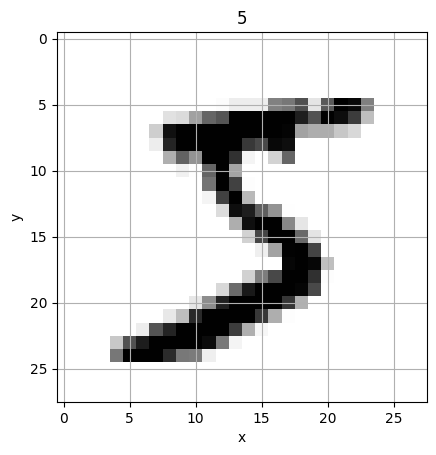

In [2]:
plt.imshow(image_train[0], cmap = plt.cm.binary)
plt.title(labels_train[0])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

# 정규화

In [3]:
image_train, image_test = image_train/255.0, image_test/255.0

# 모델

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model1=keras.models.Sequential([
    layers.Dense(128,activation = 'relu',input_shape = (28*28,) ),
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(128,activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation = 'softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model1.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
image_train_v=image_train.reshape((-1,28*28))
image_test_v=image_test.reshape((-1,28*28))
print(image_train_v.shape)
print(image_test_v.shape)

(60000, 784)
(10000, 784)


In [8]:
history = model1.fit(image_train_v, labels_train, epochs=50, batch_size=100,validation_data=(image_test_v,labels_test),verbose=1)

Epoch 1/50
600/600 [==============================] - 5s 4ms/step - loss: 0.3285 - accuracy: 0.9045 - val_loss: 0.1465 - val_accuracy: 0.9562
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.1358 - accuracy: 0.9599 - val_loss: 0.1002 - val_accuracy: 0.9686
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0934 - accuracy: 0.9712 - val_loss: 0.0892 - val_accuracy: 0.9720
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0716 - accuracy: 0.9783 - val_loss: 0.0766 - val_accuracy: 0.9741
Epoch 5/50
600/600 [==============================] - 3s 4ms/step - loss: 0.0568 - accuracy: 0.9822 - val_loss: 0.0781 - val_accuracy: 0.9761
Epoch 6/50
600/600 [==============================] - 2s 4ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0763 - val_accuracy: 0.9765
Epoch 7/50
600/600 [==============================] - 2s 3ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0769 - val_accuracy: 0.9762
Epoch 

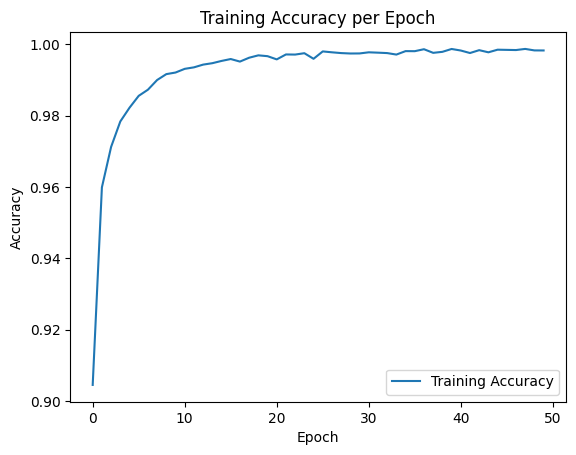

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

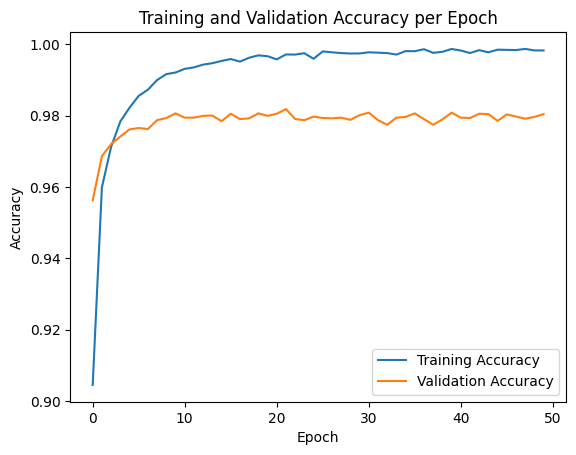

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 검증

In [11]:
model1.evaluate(image_train_v, labels_train)
model1.evaluate(image_test_v, labels_test )

313/313 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9804


[0.1421918272972107, 0.980400025844574]

1/1 [==============================] - 0s 49ms/step


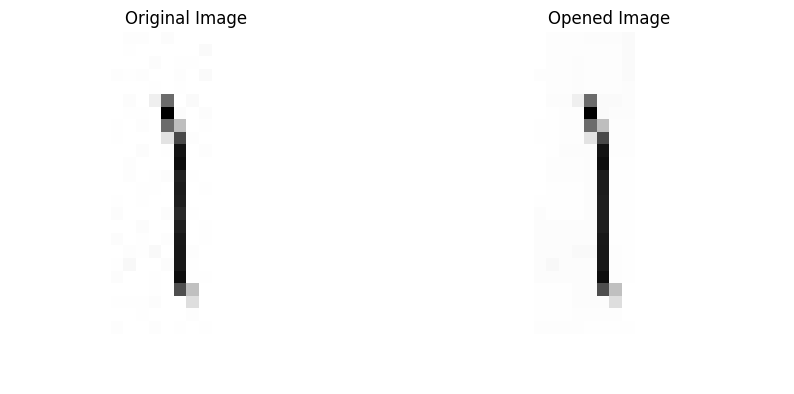

Predicted digit for original image: 7
Predicted digit for opened image: 7


In [12]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/computervision/team1/1.jpg"  # Replace this with the path to your image file
image = Image.open(image_path)

# Convert the image to black and white (grayscale)
bw_image = image.convert("L")

# Resize the image to 28x28
bw_image_resized = bw_image.resize((28, 28))

# Perform morphological opening (erosion followed by dilation)
opened_image = bw_image_resized.filter(ImageFilter.MinFilter(size=3)).filter(ImageFilter.MaxFilter(size=3))

# Convert the opened image to a numpy array
opened_image_array = np.array(opened_image)

# Flatten the opened image to shape (1, 784)
flattened_opened_image = opened_image_array.flatten().reshape(1, -1)

# Normalize the pixel values of the opened image
flattened_opened_image_normalized = flattened_opened_image / 255.0

# Make prediction for original image
prediction_original = model1.predict(flattened_opened_image)
predicted_digit_original = np.argmax(prediction_original)

# Make prediction for opened image
prediction_opened = model1.predict(flattened_opened_image_normalized)
predicted_digit_opened = np.argmax(prediction_opened)

# Display the original image and the opened image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bw_image_resized, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray')
plt.title("Opened Image")
plt.axis('off')

plt.show()

# Display the prediction result for original and opened images
print("Predicted digit for original image:", predicted_digit_original)
print("Predicted digit for opened image:", predicted_digit_opened)


In [13]:

model1.save('my_model.keras')


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 20ms/step

Total teams: 3
Accuracy: 90.0


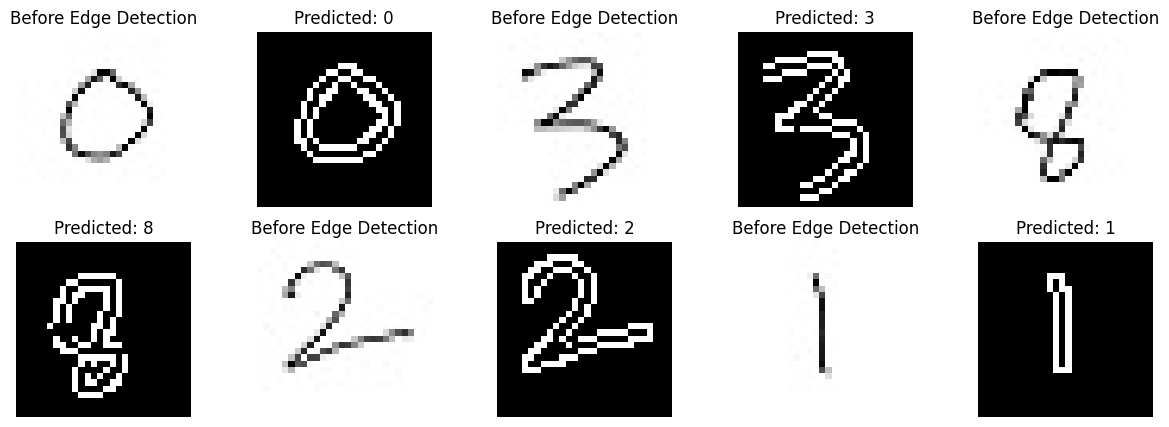

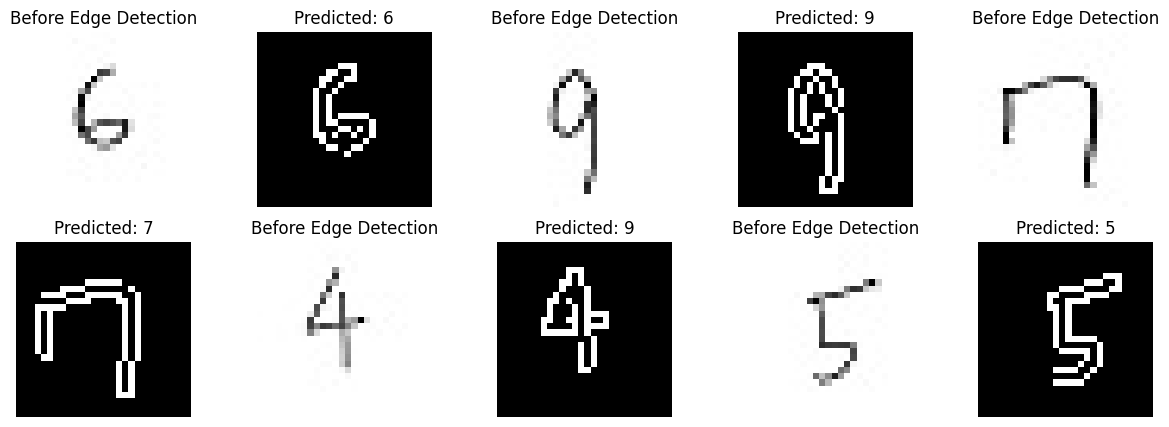

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model
import cv2

# Load the model
model = load_model('my_model.keras')

# Function to preprocess the image with Canny edge detection
def preprocess_image(img):
    # Convert image to numpy array
    img_array = image.img_to_array(img)

    # Ensure image is grayscale
    if len(img_array.shape) > 2 and img_array.shape[2] > 1:
        gray_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = img_array

    # Apply Canny edge detection
    edges = cv2.Canny(gray_img.astype(np.uint8), 100, 200)  # Adjust threshold values as needed

    # Reshape the edges to match the model's input shape
    preprocessed_img = edges.reshape((-1, 784)) / 255  # Flatten the edges

    return preprocessed_img

# Function to predict digits from images in a folder
def predict_images(image_folder):
    predictions = []
    correct_predictions = 0
    total_images = 0
    team_count = 0
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

        # Preprocess the image (before Canny edge detection)
        img_array_before = image.img_to_array(img)

        # Preprocess the image (after Canny edge detection)
        img_array = preprocess_image(img)

        prediction = model.predict(img_array)
        predicted_digit = np.argmax(prediction)
        predictions.append((img_path, img_array_before, img_array, predicted_digit))

        # Test data accuracy calculation
        total_images += 1
        if predicted_digit == int(filename[0]):  # The first character of the image file name represents the actual label
            correct_predictions += 1

        # Print predictions for every five images
        if total_images % 5 == 0:
            plot_predictions(predictions, team_count)
            predictions = []  # Reset predictions for the next team
            team_count += 1

    # Print remaining predictions
    if predictions:
        plot_predictions(predictions, team_count)

    accuracy = correct_predictions / total_images
    print("\nTotal teams:", team_count + 1)
    print("Accuracy:", accuracy*100)

# Function to plot predictions for each team
def plot_predictions(predictions, team_count):
    plt.figure(figsize=(15, 5))
    for i, (img_path, img_before, img_after, predicted_digit) in enumerate(predictions):
        # Plot image before edge detection
        plt.subplot(2, 5, i*2 + 1)
        plt.imshow(img_before[:, :, 0], cmap='gray')
        plt.title("Before Edge Detection")
        plt.axis('off')

        # Plot image after edge detection
        plt.subplot(2, 5, i*2 + 2)
        plt.imshow(img_after.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_digit}")
        plt.axis('off')
plt.show()

# Folder containing the images to predict
image_folder = "/content/drive/MyDrive/computervision/team1"

# Perform prediction on images in the folder
predict_images(image_folder)
